In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Reading intensity ranges within the cropped region for ct and pet (in suv) for all scans from the training and validation set. We exclude the test set to avoid leakage.

In [21]:
ct <- read_tsv("analysis/cropped_ct_range.tsv", col_names=c("file","min","max"), col_types="cnn") |>
	mutate(pseudo_id = str_remove(file, ".*cropped_nifti/"), pseudo_id = str_remove(pseudo_id, "_ct.*"), .before=min) |>
	filter(!str_detect(pseudo_id, "T_")) |>
	select(-file)
pet <- read_tsv("analysis/cropped_pet_suv_range.tsv", col_names=c("file","min","max"), col_types="cnn") |>
	mutate(pseudo_id = str_remove(file, ".*cropped_nifti_suv/"), pseudo_id = str_remove(pseudo_id, "_pet.*"), .before=min) |>
	filter(!str_detect(pseudo_id, "T_")) |>
	select(-file)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


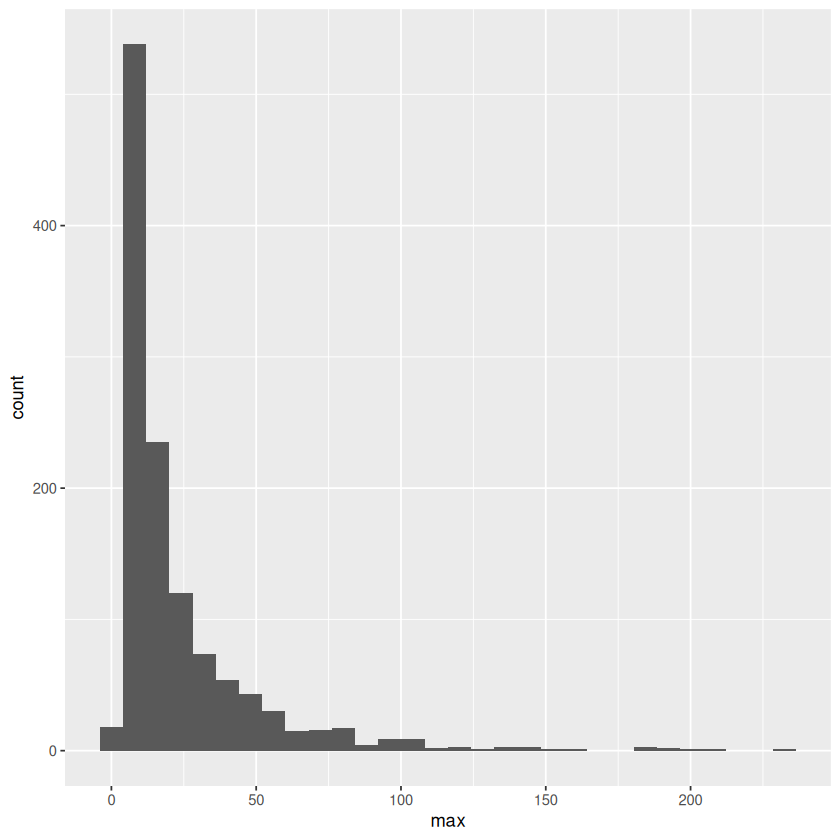

In [22]:
pet |> ggplot(aes(x=max)) + geom_histogram()

In [34]:
summary(pet)

  pseudo_id              min                  max          
 Length:1204        Min.   :-0.5380113   Min.   :  0.2624  
 Class :character   1st Qu.: 0.0000000   1st Qu.:  7.7192  
 Mode  :character   Median : 0.0000000   Median : 13.2871  
                    Mean   : 0.0005891   Mean   : 23.2972  
                    3rd Qu.: 0.0000304   3rd Qu.: 27.0794  
                    Max.   : 0.0685238   Max.   :232.6804  

In [28]:
pet |> pull(max) |> quantile(0.98)

98% 
106.2185

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


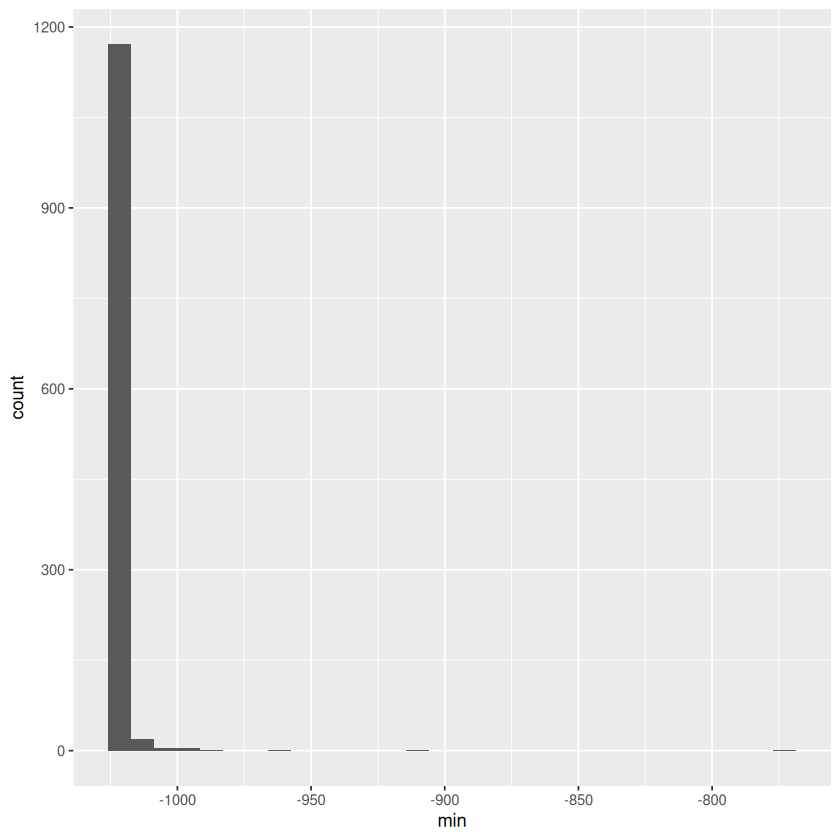

In [33]:
ct |> ggplot(aes(x=min)) + geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


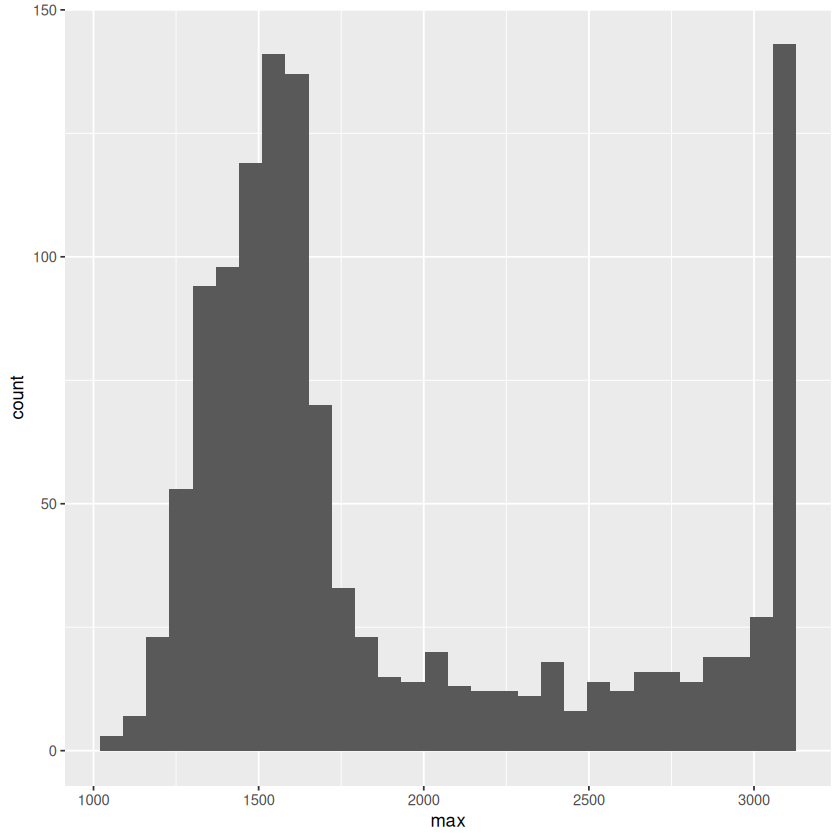

In [29]:
ct |> ggplot(aes(x=max)) + geom_histogram()

In [35]:
ct |> summary()

  pseudo_id              min             max      
 Length:1204        Min.   :-1024   Min.   :1033  
 Class :character   1st Qu.:-1024   1st Qu.:1456  
 Mode  :character   Median :-1024   Median :1612  
                    Mean   :-1023   Mean   :1904  
                    3rd Qu.:-1024   3rd Qu.:2372  
                    Max.   : -775   Max.   :3071  

In [37]:
ct |> pull(max) |> quantile(0.98)

98% 
3071